In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

melbourne = pd.read_csv('/Users/cptnemo2005/Desktop/SEIR/population_basecase.csv', sep=',',header=None)
pop       = melbourne.values
pop       = np.nan_to_num(pop, copy = True)
pop       = pop.astype(int)

od_matrix = genfromtxt('/Users/cptnemo2005/Desktop/SEIR/OD_Matrix_basecase.csv', delimiter=',')
od_matrix = np.reshape(od_matrix, (12,309,309))
od_matrix = np.nan_to_num(od_matrix, copy = True)
od_matrix = od_matrix.astype(int)

#At this point only have 25% for pop and flow, now we scale them up

pop = pop*4
od_matrix = od_matrix*4

for i in range(1,12):
    pop[i,:] = pop[0,:]
to_this_origin   = np.sum(od_matrix,axis = 1)
from_this_origin = np.sum(od_matrix,axis = 2)

pop = pop + to_this_origin - from_this_origin

import numpy as np
import pickle 
import matplotlib.pyplot as plt
def sir_plot(res):
    plt.plot(res[::12,0], color='r',label='Susceptible')
    plt.plot(res[::12,1], color='g',label='Infectous')
    plt.plot(res[::12,2], color='b',label='Recovered')
    plt.plot(res[::12,3], color='y',label='Hospital')     
    plt.legend()

from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')
r = od_matrix.shape[0]
n = pop.shape[1]
N = 4632672.0


import random
OD_id = [p for p in range (0,309)]
# Take 20 random location
random.seed(30)
initialInd = random.sample(OD_id, 20)

initial = np.zeros(n)
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = 5.2*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run virus-sim.py

alpha = np.ones(od_matrix.shape)
iterations = 3000
res = {}
inf = 10

res['baseline'] = sir(model,pop,od_matrix,alpha,iterations,inf)

import geopandas as gpd
import contextily as ctx
melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

/Users/cptnemo2005/Desktop/SEIR/virus-sim.py:56: RuntimeWarning: invalid value encountered in true_divide
  realflow = realflow / realflow.sum(axis=2)[:,:, np.newaxis]


(3000, 309)
3961082.870055288


<AxesSubplot:>

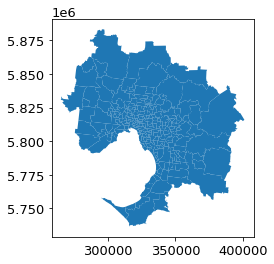

In [20]:
import geopandas as gpd
import contextily as ctx
melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf.plot()

0.0
26163.49644031876


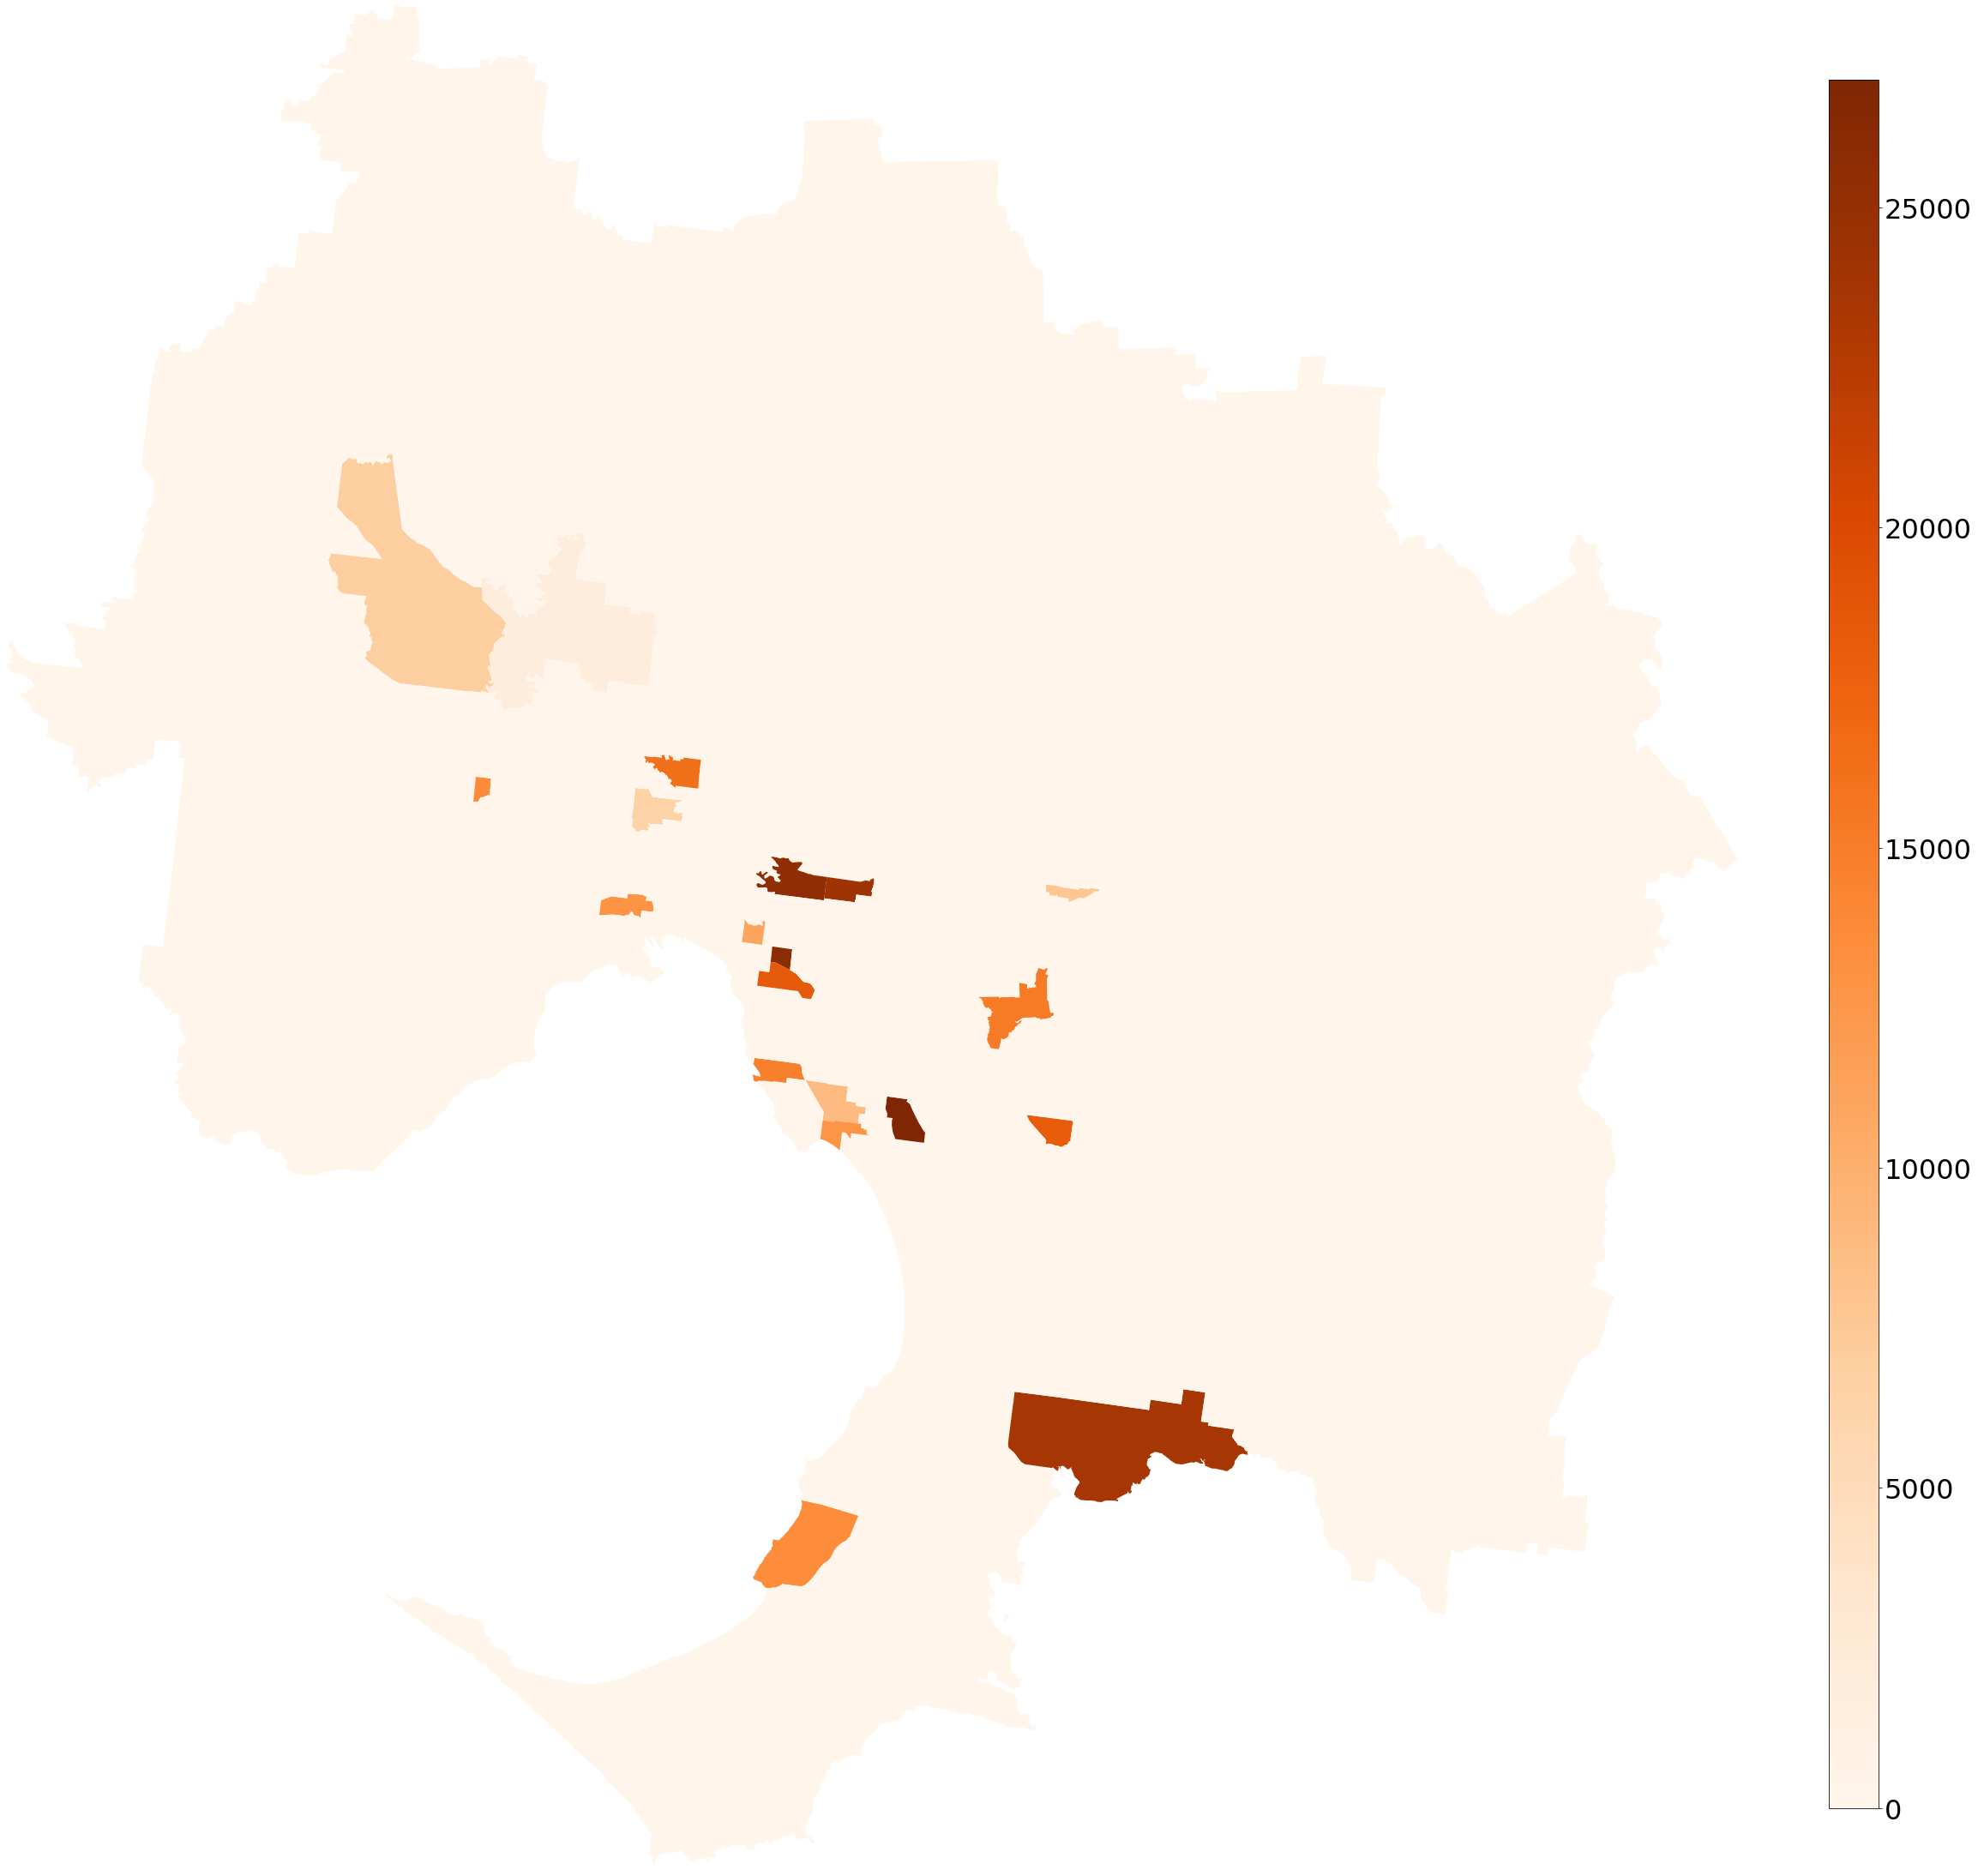

In [9]:
print(min(melbourne_gpd.population))
print(max(melbourne_gpd.population))
plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Oranges',\
                          norm=plt.Normalize(0,27000))

sm._A=[]
#
#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig('melbourne_infect_dis_{}.jpg'.format(iterations))
plt.show()

In [21]:
y = res['baseline'][0][::12,1]

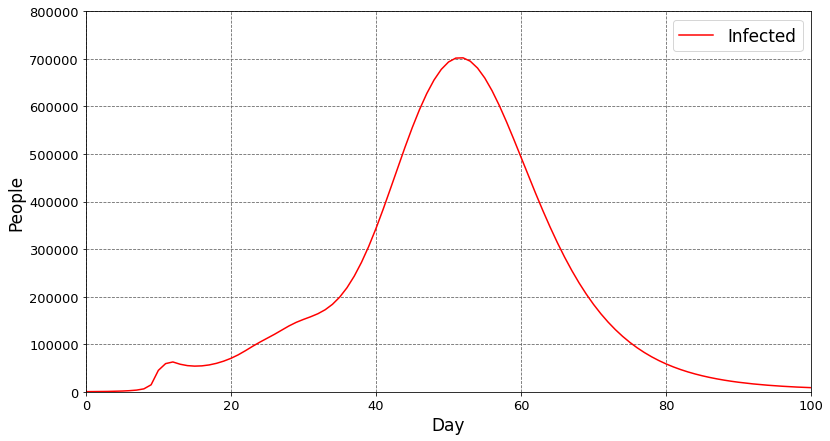

In [23]:
def sir_plot_r(x):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 800000,1)
    plt.xlabel("Day",fontsize=17)
    plt.ylabel("People",fontsize=17)
    plt.plot(x, color='r',label='Infected')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.legend(loc=1, prop={'size':17})
    plt.savefig('intected_SIRWITHMOBILITY.jpg')
    
sir_plot_r(y) 

In [11]:
x = res['baseline'][0][::12,1]

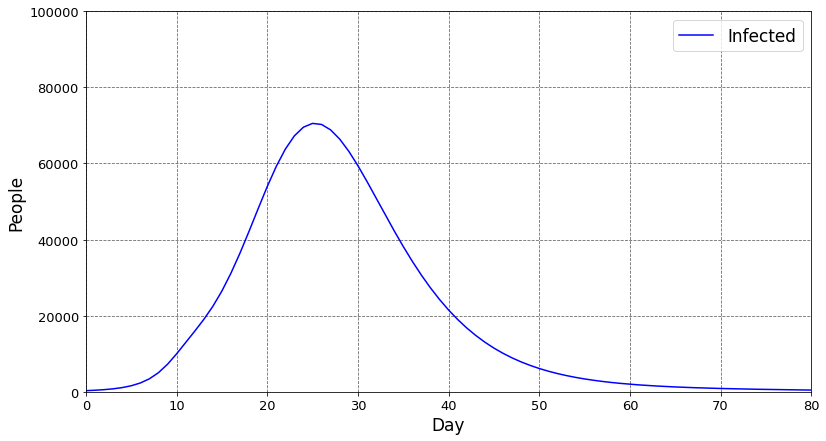

In [18]:
def sir_plot_r(x):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 80,1)
    plt.ylim(0, 100000,1)
    plt.xlabel("Day",fontsize=17)
    plt.ylabel("People",fontsize=17)
    plt.plot(x, color='b',label='Infected')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':17})
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.savefig('intected_SIRWITHOUTMOBILITY.jpg')
    
sir_plot_r(x) 

In [76]:
import numpy as np
import heapq

In [78]:
y = res['baseline'][2]

In [79]:
y_ = np.sum(y,axis=0)

In [80]:
index_of_10_with_mobility = heapq.nlargest(10, range(len(y_)), y_.take)

In [81]:
index_of_10_with_mobility

[262, 181, 94, 296, 124, 266, 294, 134, 15, 49]

721016.4277785706

In [82]:
for i in range(0,len(index_of_10_with_mobility)):
    print(melbourne_gdf['SA2_NAME16'][index_of_10_with_mobility[i]])

Malvern East
Donvale - Park Orchards
Werribee - West
Doreen
Dingley Village
Moorabbin - Heatherton
Epping - South
Cranbourne West
Armadale
Box Hill North


In [83]:
for i in range(0,len(index_of_10_with_mobility)):
    print(y_[index_of_10_with_mobility[i]])

33367.66333530798
30709.766324131608
28821.529816389426
26733.949974132047
26192.739922258985
26048.840991899033
25246.151039772067
25186.74151216335
25110.3173438448
25103.253624156085


In [39]:
import geopandas as gpd
melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

In [45]:
melbourne_gdf['SA2_NAME16'][0]

'Glen Iris - East'

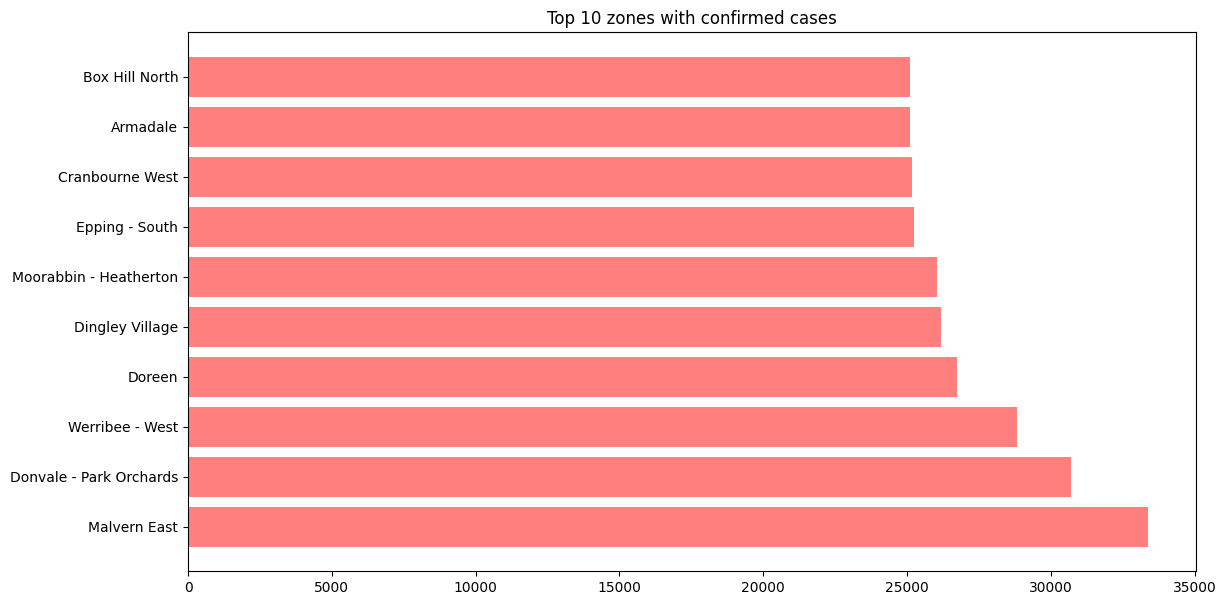

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Malvern East',
'Donvale - Park Orchards',
'Werribee - West',
'Doreen',
'Dingley Village',
'Moorabbin - Heatherton',
'Epping - South',
'Cranbourne West',
'Armadale',
'Box Hill North')
y_pos = np.arange(len(objects))
performance = [33367.66333530798,
30709.766324131608,
28821.529816389426,
26733.949974132047,
26192.739922258985,
26048.840991899033,
25246.151039772067,
25186.74151216335,
25110.3173438448,
25103.253624156085]
plt.figure(figsize=(13,7))
plt.barh(y_pos, performance, align='center', alpha=0.5,color='r')
plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
plt.title('Top 10 zones with confirmed cases')
plt.savefig('top10zones_SIRWITHMOBILITY.jpg')
plt.show()

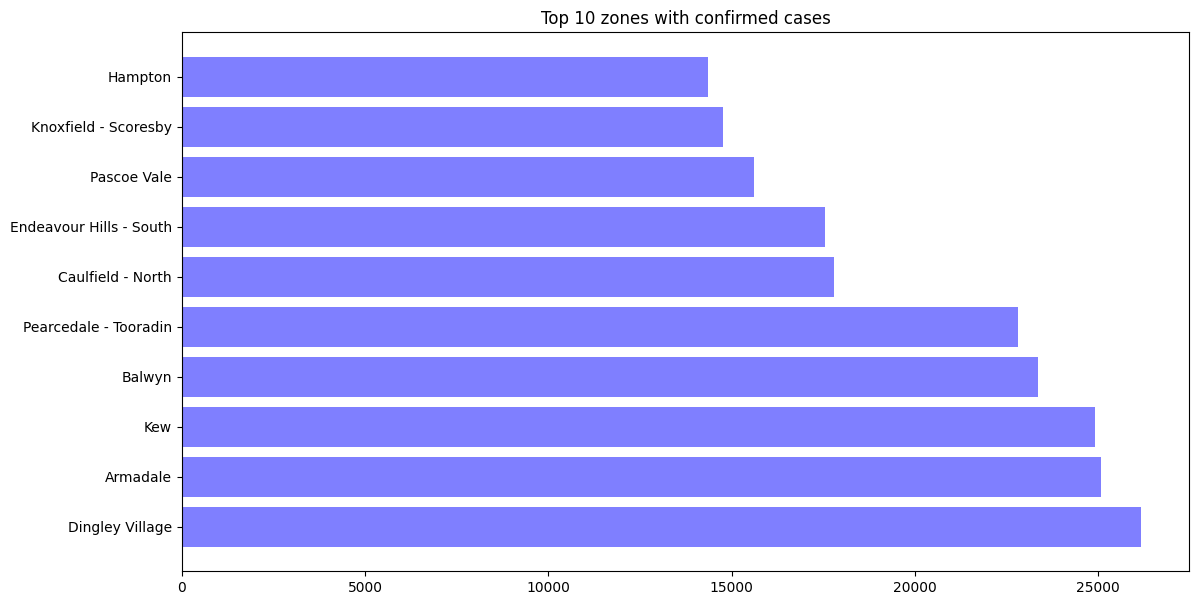

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Dingley Village',
'Armadale',
'Kew',
'Balwyn',
'Pearcedale - Tooradin',
'Caulfield - North',
'Endeavour Hills - South',
'Pascoe Vale',
'Knoxfield - Scoresby',
'Hampton')
y_pos = np.arange(len(objects))
performance = [26181.884692503547,
25091.78771836894,
24908.24331583087,
23369.29272972643,
22819.779122376403,
17794.633304788556,
17537.84299502442,
15602.63634090024,
14754.668538478627,
14353.712156611517]
plt.figure(figsize=(13,7))
plt.barh(y_pos, performance, align='center', alpha=0.5,color='b')
plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
plt.title('Top 10 zones with confirmed cases')
plt.savefig('top10zones_SIRWITHOUTMOBILITY.jpg')
plt.show()

In [60]:
x = res['baseline'][2]

In [68]:
x_ = np.sum(x,axis=0)

In [70]:
len(x_)

309

In [71]:
index_of_10_without_mobility = heapq.nlargest(10, range(len(x_)), x_.take)

In [72]:
index_of_10_without_mobility

[124, 15, 306, 3, 131, 37, 205, 276, 192, 41]

In [73]:
for i in range(0,len(index_of_10_without_mobility)):
    print(melbourne_gdf['SA2_NAME16'][index_of_10_without_mobility[i]])

Dingley Village
Armadale
Kew
Balwyn
Pearcedale - Tooradin
Caulfield - North
Endeavour Hills - South
Pascoe Vale
Knoxfield - Scoresby
Hampton


In [74]:
for i in range(0,len(index_of_10_without_mobility)):
    print(x_[index_of_10_without_mobility[i]])

26181.884692503547
25091.78771836894
24908.24331583087
23369.29272972643
22819.779122376403
17794.633304788556
17537.84299502442
15602.63634090024
14754.668538478627
14353.712156611517


In [53]:
x.astype(int)

array([  300,   402,   541,   731,   993,  1352,  1847,  2528,  3464,
        4742,  6466,  8749, 11689, 15342, 19704, 24710, 30257, 36220,
       42440, 48707, 54758, 60291, 65001, 68630, 71001, 72037, 71763,
       70292, 67800, 64499, 60608, 56339, 51878, 47380, 42969, 38733,
       34735, 31014, 27589, 24466, 21641, 19101, 16831, 14811, 13020,
       11438, 10044,  8819,  7745,  6805,  5983,  5267,  4642,  4098,
        3625,  3213,  2856,  2546,  2277,  2043,  1840,  1664,  1511,
        1378,  1262,  1161,  1072,   994,   926,   866,   812,   764,
         721,   682,   647,   615,   586,   558,   533,   509,   486,
         465,   445,   426,   407,   390,   373,   357,   341,   326,
         311,   297,   284,   271,   258,   246,   234,   223,   212,
         202,   192,   182,   173,   164,   156,   148,   140,   133,
         126,   119,   113,   107,   101,    96,    90,    85,    81,
          76,    72,    68,    64,    61,    57,    54,    51,    48,
          45,    43,

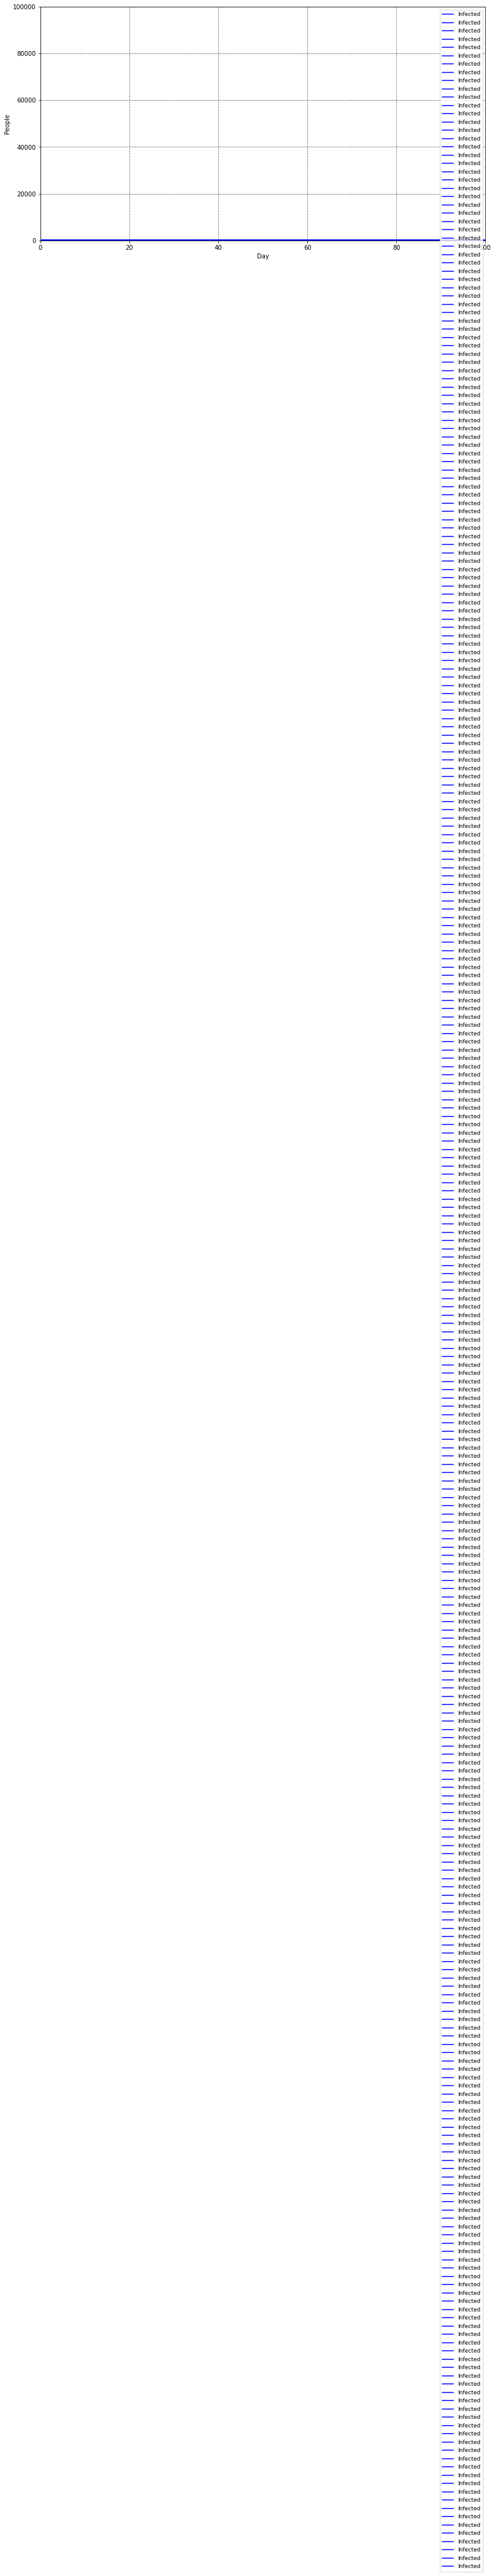

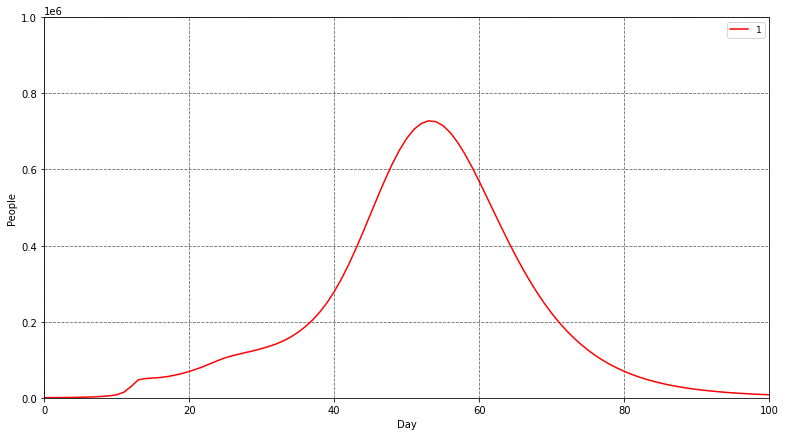

In [15]:
def sir_plot_r(x):
    plt.figure(figsize=(13,7))
    plt.xlim(0, 100,1)
    plt.ylim(0, 1000000,1)
    plt.xlabel("Day") # Text for X-Axis
    plt.ylabel("People") 
    plt.plot(x, color='r',label='1')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.legend(loc=1, prop={'size':9})
    #plt.savefig('intected_numberlocations.jpg')
    
sir_plot_r(y) 

Max number of hospitalised people:  20266 
 Day with max hospitalised people:  29


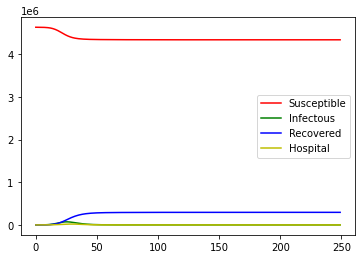

In [3]:
print(
"Max number of hospitalised people: ", int(res["baseline"][0][:,3].max()),
"\n",
"Day with max hospitalised people: ", int(res["baseline"][0][:,3].argmax()/12)
)
# plot result
sir_plot(res["baseline"][0])

In [4]:
import geopandas as gpd
import contextily as ctx
melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds

hosp = res['baseline'][0][::12,3]

newI = res['baseline'][2]

print(newI.shape)


newI.astype(int)

newI = np.sum(newI,axis=0)
print(np.sum(newI))

newI.astype(int)

melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI

(3000, 309)
294319.4163209577


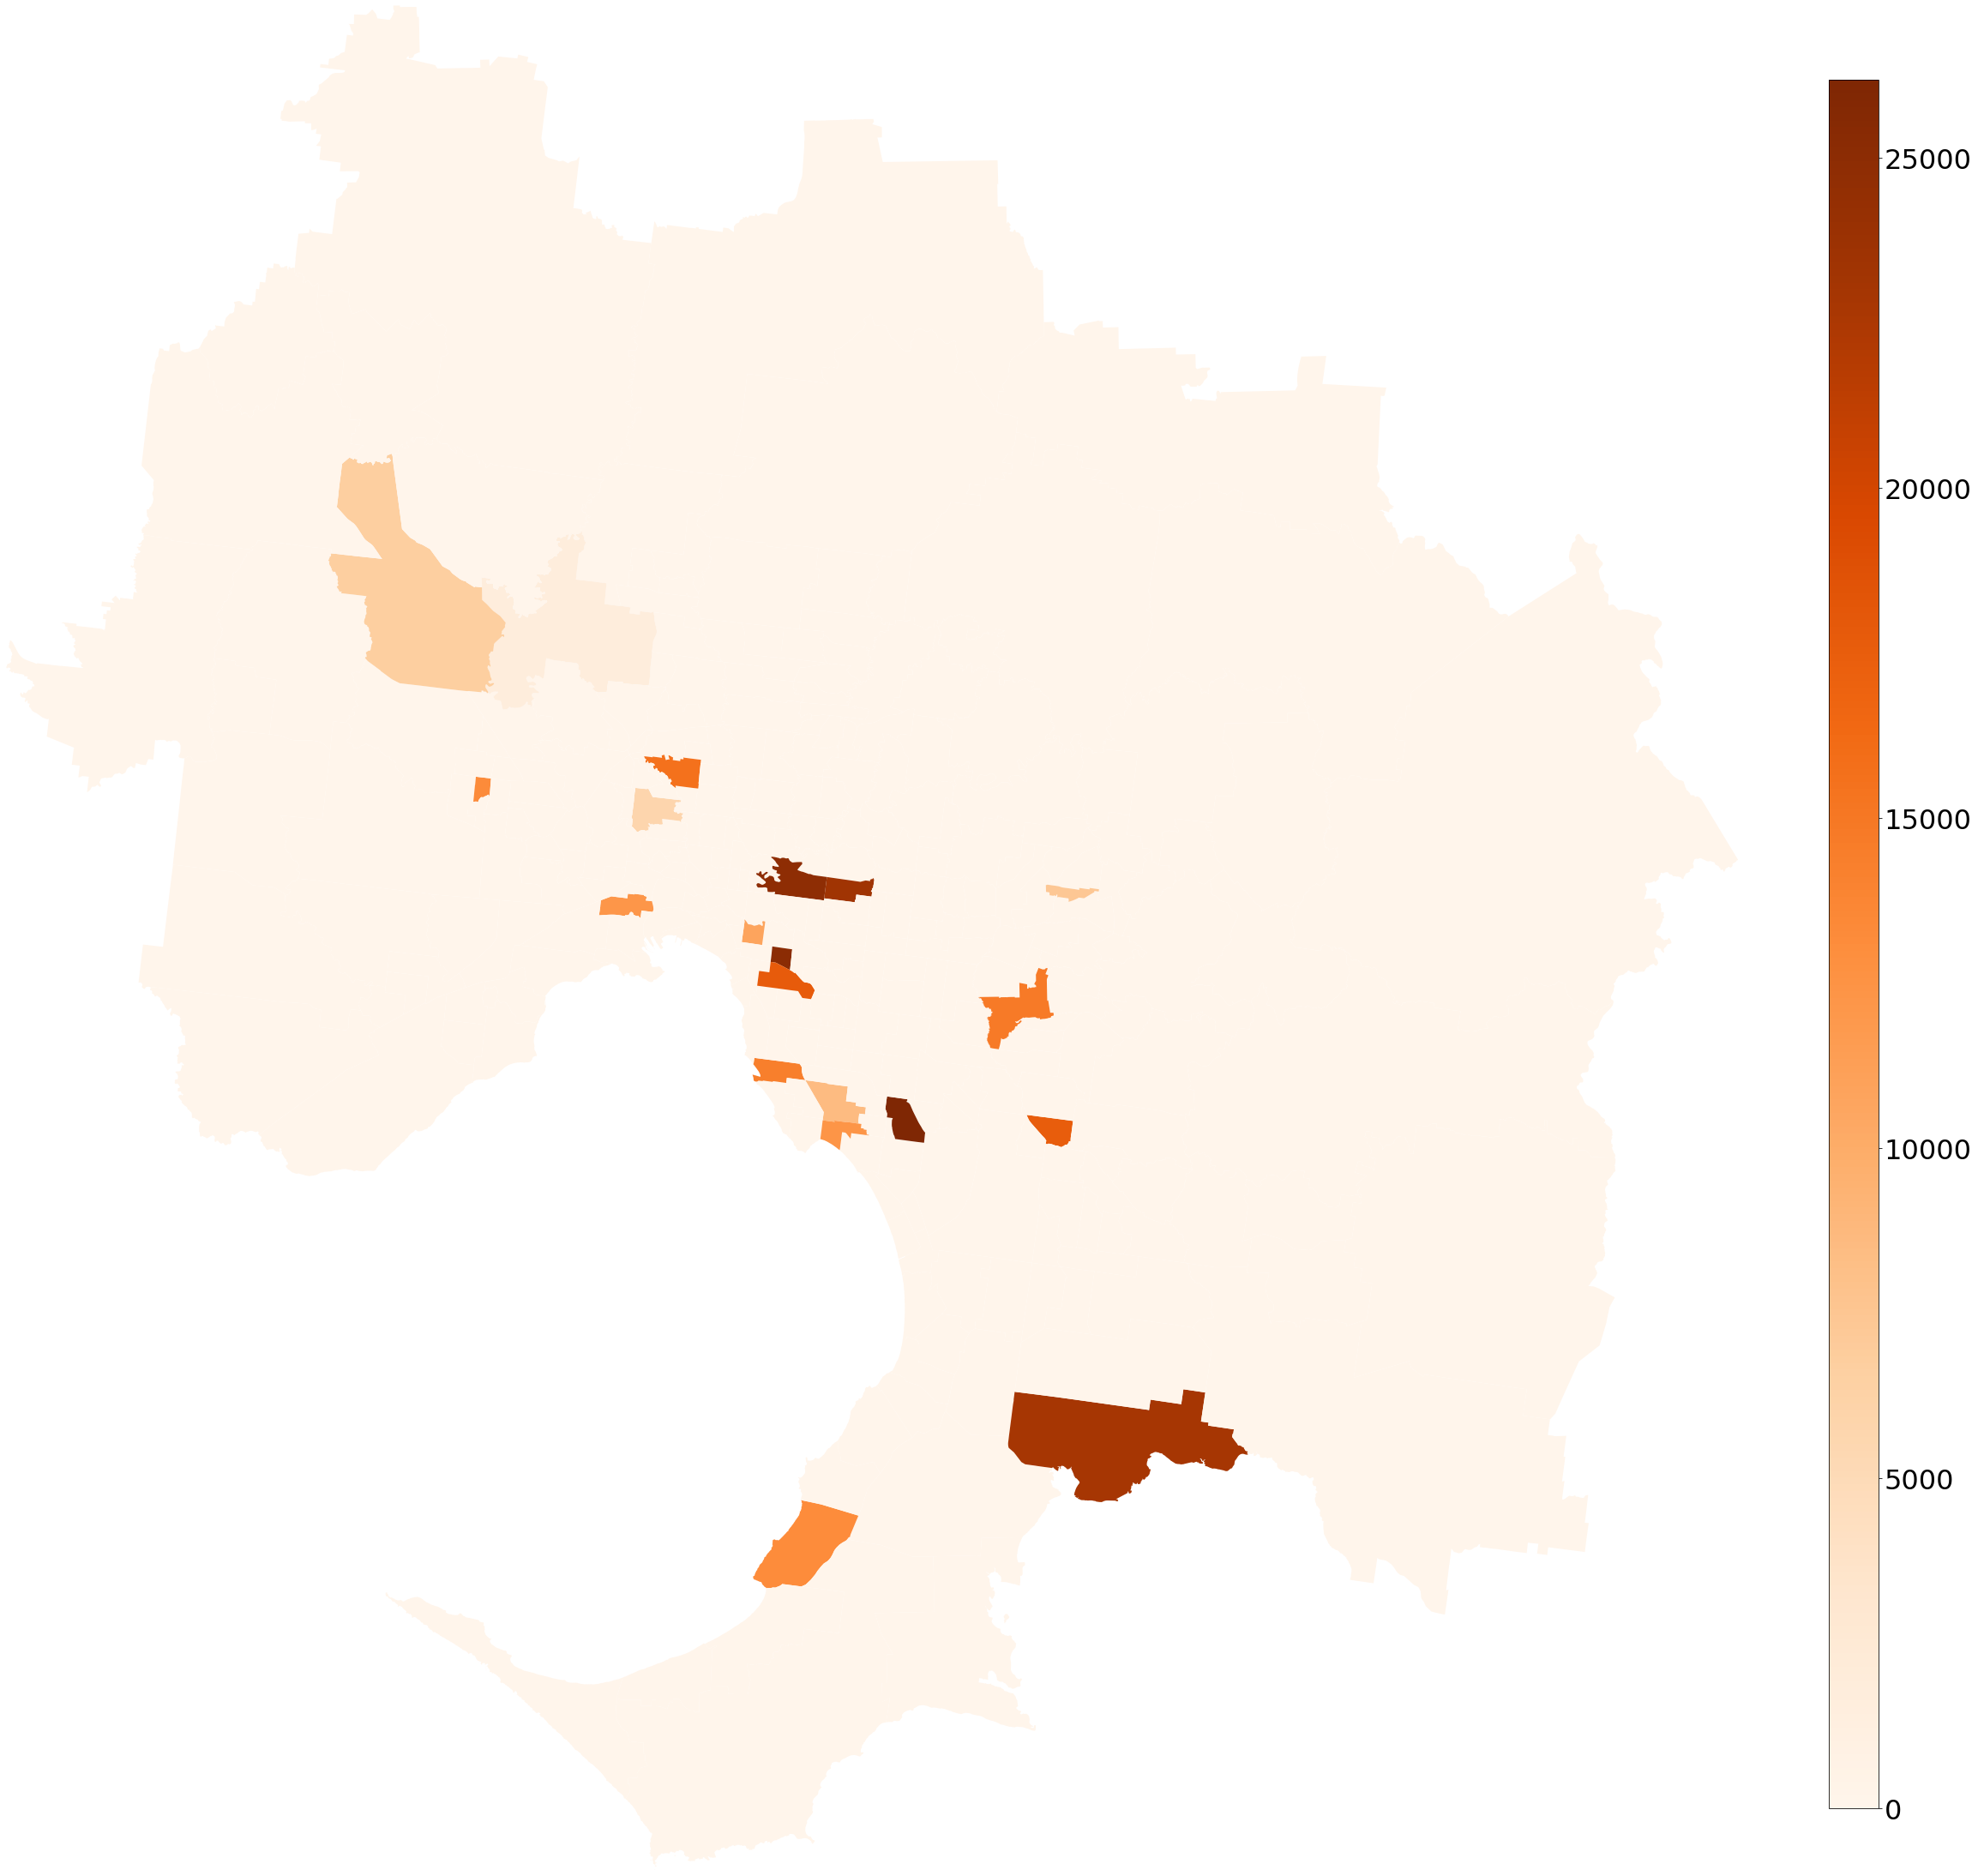

In [5]:
plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap='Oranges')

cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap='Oranges',\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),vmax=max(melbourne_gpd.population)))

sm._A=[]

#Draw colormap into cbax

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig("melbourne_infect_dis_tradition.jpg")
plt.show()